In [1]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *

In [2]:
data_all = np.loadtxt('../data_complete.txt')
data_all = data_all - np.median(data_all, axis=0)
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

In [8]:
quad_all = np.copy(data_all)

for i in range(len(comp_ind)-1):
    for j in range(i+1, len(comp_ind)):
        quad_all = np.hstack((quad_all, (data_all[:,comp_ind[i]]*data_all[:,comp_ind[j]])[:,None]))

all_quad_bin = np.vsplit(quad_all, 6)
quad_init = np.vstack([all_quad_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1] - all_bin[i] for i in range(5)])

print('# of quadratic variables:', int(len(comp_ind)*(len(comp_ind)-1)/2), '\n')
print('(99,27) to 99', '\n', 'Size of predictor:', quad_init.shape, '\n', 'Size of target:', all_diff.shape, '\n')

data_comp = np.copy(data_all[:, comp_ind])
comp_bin = np.vsplit(data_comp, 6)
comp_diff = np.vstack([comp_bin[i+1] - comp_bin[i] for i in range(5)])
print('(99,27) to 27', '\n', 'Size of predictor:', quad_init.shape, '\n', 'Size of target:', comp_diff.shape)

# of quadratic variables: 351 

(99,27) to 99 
 Size of predictor: (30390, 450) 
 Size of target: (30390, 99) 

(99,27) to 27 
 Size of predictor: (30390, 450) 
 Size of target: (30390, 27)


In [ ]:
import timeit

start = timeit.default_timer()
w, sigma, bias = ER_quad_elastic(quad_init, all_diff, power=1, alpha_=1, ratio_=0)
end = timeit.default_timer()

print('(99,27) to 99, simulation time: %s' % (end-start))
print(w.shape, bias.shape, sigma.shape)

ridge_9927 = list([w, sigma, bias])
with ('./pickles/ridge_9927.pkl', 'wb') as f:
    pickle.dump(ridge_9927, f)
    
start = timeit.default_timer()
w, sigma, bias = ER_quad_elastic(quad_init, comp_diff, power=1, alpha_=1, ratio_=0)
end = timeit.default_timer()

print('(99,27) to 27, simulation time: %s' % (end-start))
print(w.shape, bias.shape, sigma.shape)

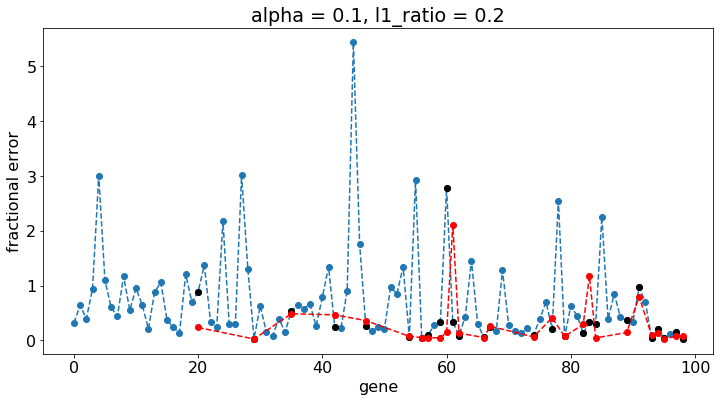

alpha = 0.1, l1_ratio = 0.2 
 0.388 0.697 +/- 0.833 
 0.205 0.333 +/- 0.534 
 0.134 0.295 +/- 0.439


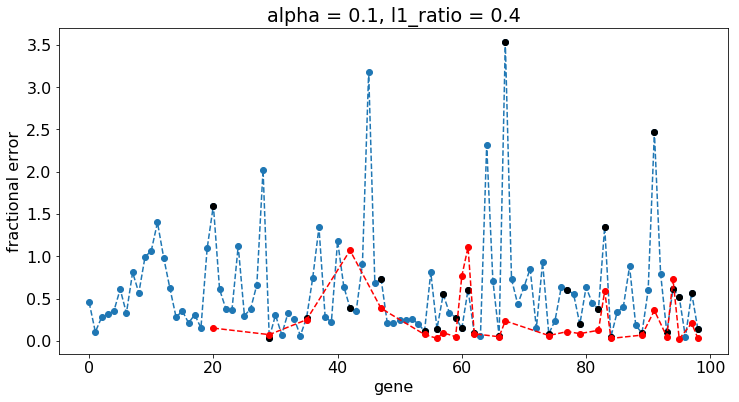

alpha = 0.1, l1_ratio = 0.4 
 0.381 0.59 +/- 0.606 
 0.275 0.581 +/- 0.791 
 0.096 0.255 +/- 0.312


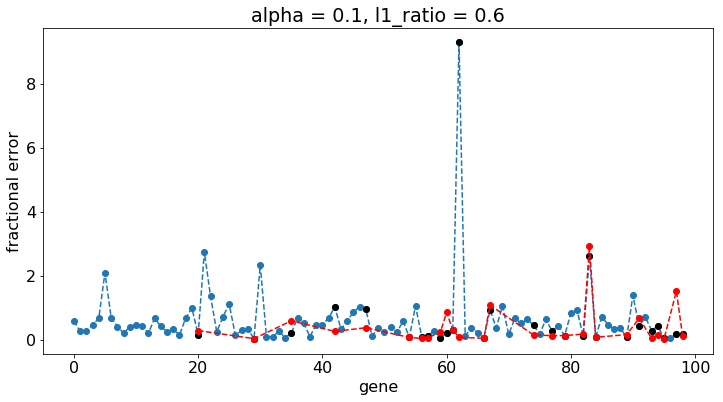

alpha = 0.1, l1_ratio = 0.6 
 0.372 0.596 +/- 1.012 
 0.173 0.692 +/- 1.764 
 0.147 0.388 +/- 0.609


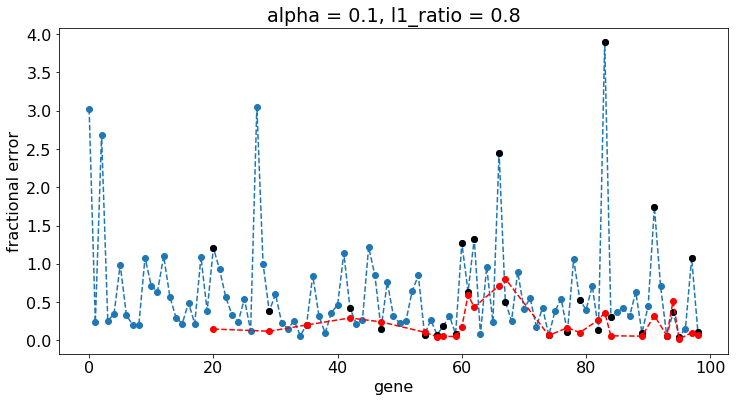

alpha = 0.1, l1_ratio = 0.8 
 0.383 0.609 +/- 0.667 
 0.304 0.649 +/- 0.871 
 0.149 0.228 +/- 0.212


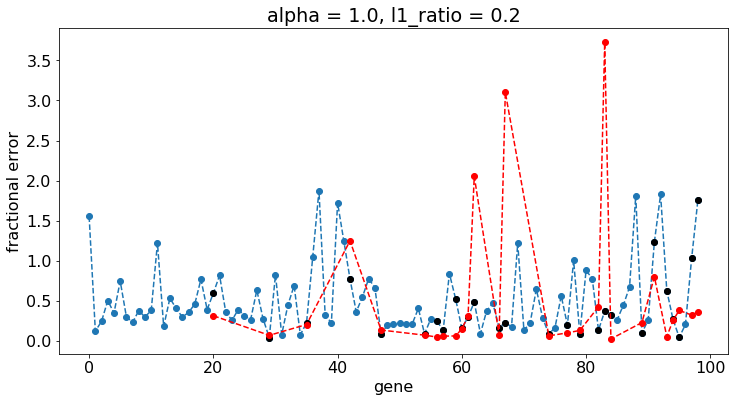

alpha = 1.0, l1_ratio = 0.2 
 0.354 0.497 +/- 0.431 
 0.229 0.38 +/- 0.401 
 0.203 0.546 +/- 0.92


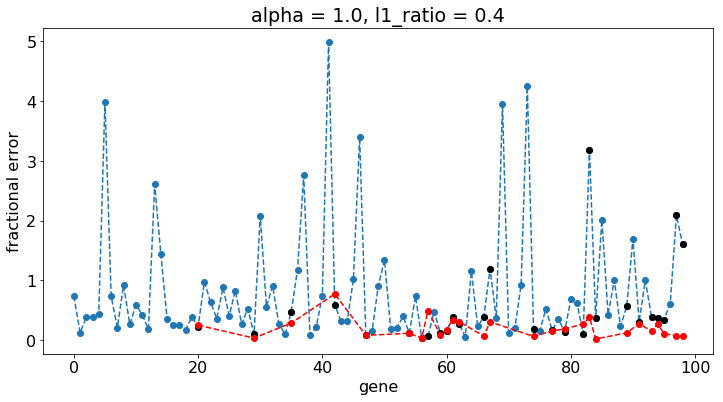

alpha = 1.0, l1_ratio = 0.4 
 0.389 0.786 +/- 0.979 
 0.309 0.521 +/- 0.703 
 0.157 0.205 +/- 0.164


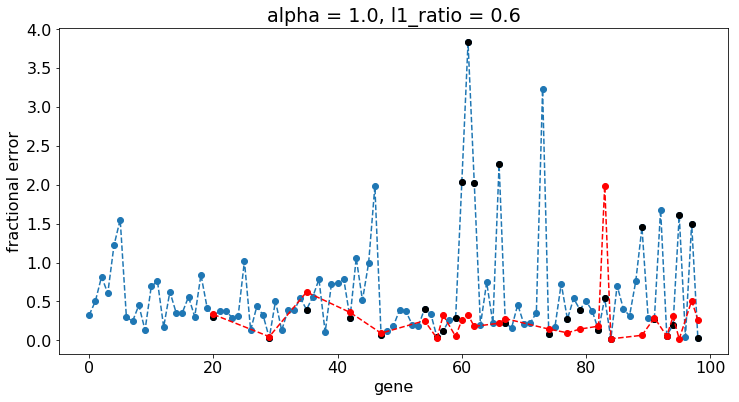

alpha = 1.0, l1_ratio = 0.6 
 0.384 0.586 +/- 0.637 
 0.283 0.7 +/- 0.924 
 0.221 0.277 +/- 0.367


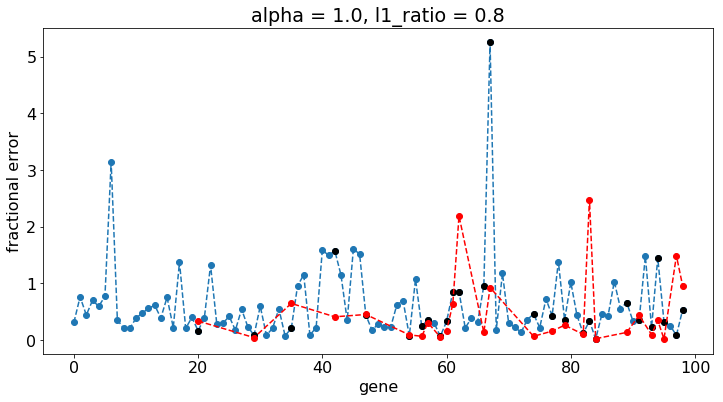

alpha = 1.0, l1_ratio = 0.8 
 0.39 0.609 +/- 0.677 
 0.354 0.623 +/- 0.987 
 0.264 0.483 +/- 0.625


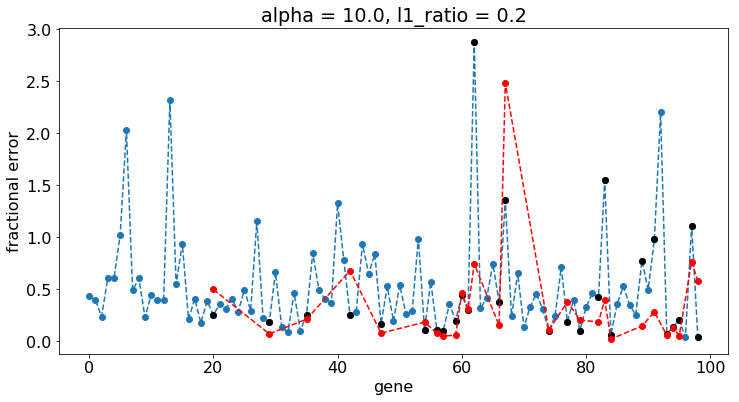

alpha = 10.0, l1_ratio = 0.2 
 0.396 0.516 +/- 0.488 
 0.201 0.469 +/- 0.619 
 0.184 0.346 +/- 0.473


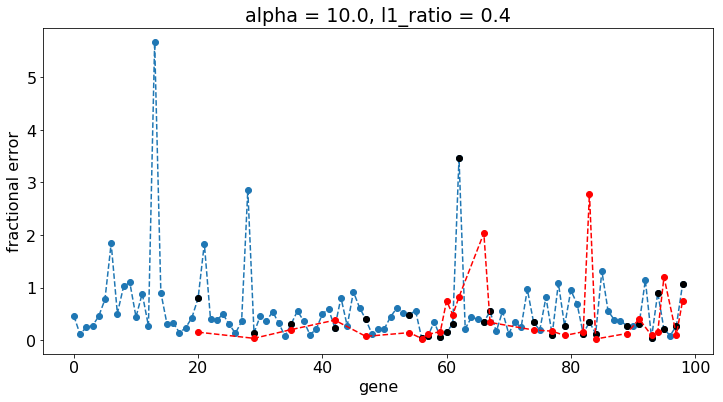

alpha = 10.0, l1_ratio = 0.4 
 0.361 0.563 +/- 0.729 
 0.274 0.433 +/- 0.646 
 0.162 0.441 +/- 0.633


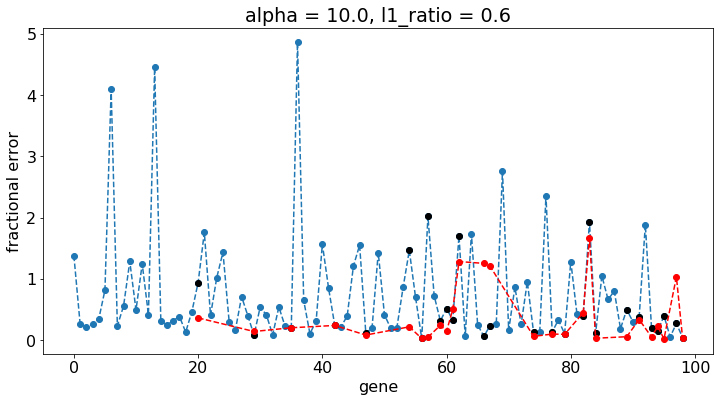

alpha = 10.0, l1_ratio = 0.6 
 0.396 0.728 +/- 0.877 
 0.239 0.481 +/- 0.578 
 0.202 0.375 +/- 0.462


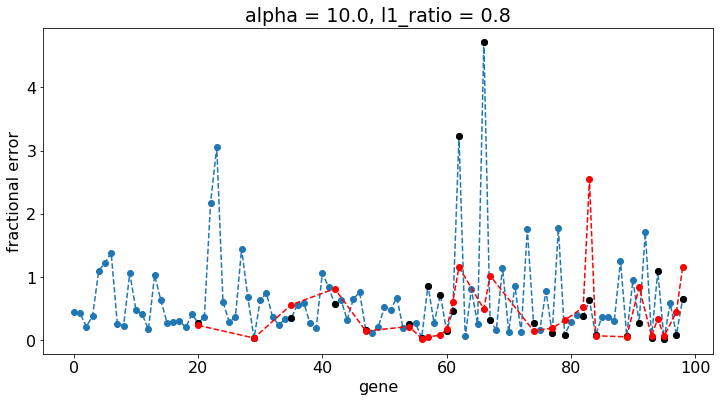

alpha = 10.0, l1_ratio = 0.8 
 0.383 0.618 +/- 0.698 
 0.277 0.592 +/- 1.014 
 0.238 0.461 +/- 0.536


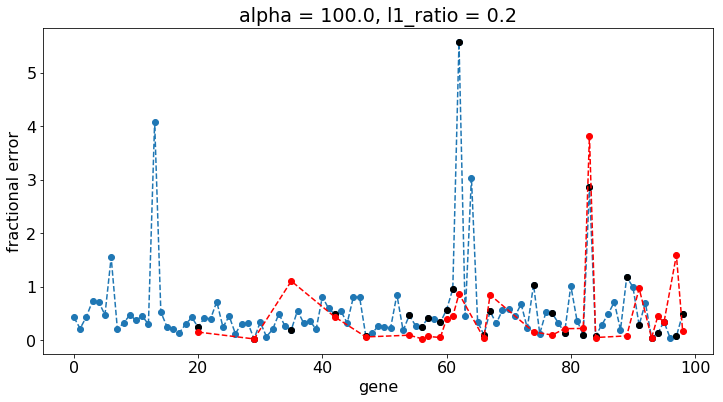

alpha = 100.0, l1_ratio = 0.2 
 0.37 0.557 +/- 0.764 
 0.338 0.652 +/- 1.113 
 0.183 0.479 +/- 0.763


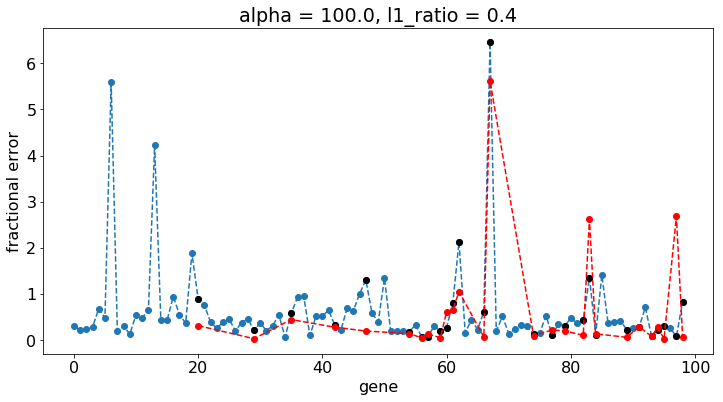

alpha = 100.0, l1_ratio = 0.4 
 0.37 0.608 +/- 0.939 
 0.282 0.686 +/- 1.227 
 0.196 0.608 +/- 1.189


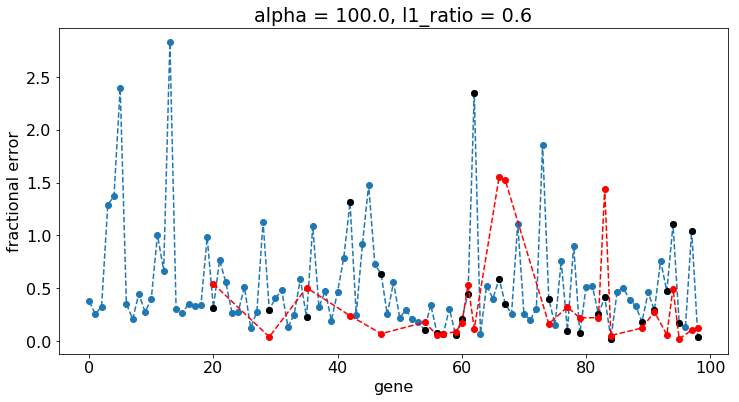

alpha = 100.0, l1_ratio = 0.6 
 0.354 0.526 +/- 0.499 
 0.29 0.429 +/- 0.499 
 0.166 0.344 +/- 0.438


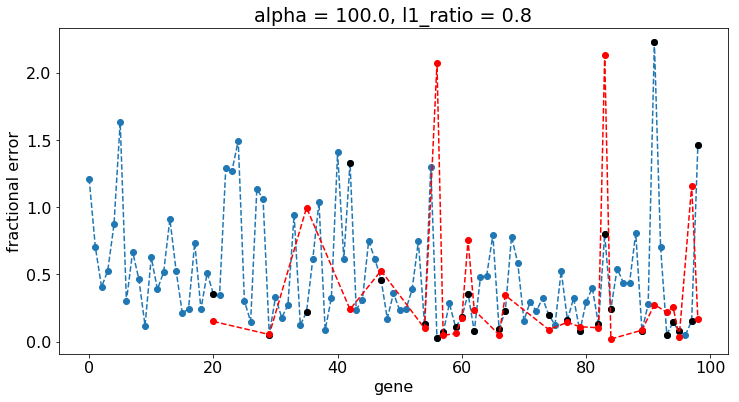

alpha = 100.0, l1_ratio = 0.8 
 0.355 0.495 +/- 0.421 
 0.153 0.351 +/- 0.51 
 0.169 0.393 +/- 0.559


In [19]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.linear_model import ElasticNet

grid = {'alpha': np.logspace(-1,2,4),\
            'l1_ratio' :[.2, .4, .6, .8]}
a=list(ParameterGrid(grid))

for i in range(len(a)):
    alpha = a[i]['alpha']
    ratio = a[i]['l1_ratio']
    
    w, sigma, bias = ER_quad_elastic(quad_init, all_diff, power=3, alpha_=alpha, ratio_=ratio)
    data_actual = np.vstack([all_bin[i+1] for i in range(5)])
    data_pred = all_init + np.tanh(bias + quad_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[1]))
    E_all = (np.sum(np.abs(data_pred - data_actual)**2, axis=0)/np.sum(np.abs(data_actual)**2, axis=0))**1/2
    
    plt.figure(figsize=(12,6))
    plt.plot(range(data_pred.shape[1]), E_all, 'o--')
    plt.plot(comp_ind, E_all[comp_ind], 'ko')
    # plt.plot(comp_ind, E[comp_ind], 'ko')
    # plt.plot(comp_ind, comp_E, 'ro')
    # plt.xlim(0,26)
    # plt.ylim(0,1)
    
    w, sigma, bias = ER_quad_elastic(quad_init, comp_diff, power=3, alpha_=alpha, ratio_=ratio)
    data_actual = np.vstack([comp_bin[i+1] for i in range(5)])
    data_pred = all_init[:, comp_ind] + np.tanh(bias + quad_init.dot(w)) + sigma*npr.normal(size=(1,w.shape[1]))
    E_comp = (np.sum(np.abs(data_pred - data_actual)**2, axis=0)/np.sum(np.abs(data_actual)**2, axis=0))**1/2
    
    plt.plot(comp_ind, E_comp, 'ro--')
    plt.xlabel('gene')
    plt.ylabel('fractional error')
    plt.title('alpha = %s, l1_ratio = %s' \
              % (alpha, ratio))
    plt.show()
    print('alpha = %s, l1_ratio = %s' % (alpha, ratio),\
          '\n', round(np.median(E_all), 3), round(np.mean(E_all), 3), '+/-', round(np.std(E_all), 3),\
          '\n', round(np.median(E_all[comp_ind]), 3), round(np.mean(E_all[comp_ind]), 3), '+/-', round(np.std(E_all[comp_ind]), 3),\
          '\n', round(np.median(E_comp), 3), round(np.mean(E_comp), 3), '+/-', round(np.std(E_comp), 3))